<a href="https://colab.research.google.com/github/valerybravo0709/Taller-estad-stica-aplicada-/blob/main/Practica%20R/Clase_Estadistica_Aplicada_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

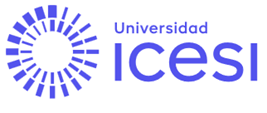

FACULTAD BARBERI DE INGENIERIAS, DISEÑO Y CIENCIAS APLICADAS.

DEPARTAMENTO DE CIENCIAS FISICAS Y APLICADAS.

**Profesor:** Daniel Osorio

**Integrantes Grupo:**

1.Acosta Granada Sofia
2.Bravo Alarcón Valery
3.Grijalba Pantoja Sara Sofia
4.Toro Navarro Sofia

**Grupo:03**

**Nota:** Solo lo debe entregar un integrante del grupo


## Analisis Exploratorio con Python

Las autoridades de salud de la ciudad están preocupadas porque en cierta zona de esta se viene presentado un problema de salud en niños recién nacidos y consideran que el problema se debe a los malos hábitos de vida de las madres. Desarrollan un estudio a todas las madres que durante un periodo de seis meses dieron a luz un bebe en dicha zona. En este estudio se evaluaron aspectos de la historia clínica y sus hábitos de vida. La información de cada una de las madres y su hijo quedó registrada en la siguiente tabla.

**Id:** número identificador de la madre.

**Bajo_peso:** indica si él recién nacido tuvo bajo paso al momento de nacer (1=Si; 0=No).

**Edad:** edad de la madre en años cumplidos.

**Peso_madre:** peso de la madre en libras.

**Raza:** raza de la madre.

**Fumar:** antecedente de consumo de cigarrillo de la madre (1=Si; 0=No).

**TPP:** antecedente materno del número partos prematuros antes de este embarazo.

**Ant_HTA:** antecedente materno de hipertensión arterial (1=Si; 0=No).

**Irrit_uterina:** antecedente en este embarazo de irritabilidad uterina (1=Si; 0=No).

**Visitas_md:** número de visitas de control médico en este embarazo.

**peso_nacer:** peso real al nacer en gramos del recién nacido

**Notas importantes:**
- **Abra un espacio debajo de cada ítem para colocar su respuesta. La respuesta valida a cada ítem es la que se encuentre debajo de este.**
- **En los puntos 5 a 13 el resultado del procedimiento estadístico vale 50% y 50% la interpretación.**




Ayúdele al grupo de investigación a desarrollar el análisis estadístico de las siguientes preguntas:

1. Defina la población de estudio.
2. Determine si la información de la tabla corresponde a una población a una muestra. Explique claramente.
3. Identifique cuáles variables son cualitativas y cuales son cuantitativas.
4. Clasifique cada una de las variables como nominal, ordinal, discreta o continua.
5. Construya la distribución de frecuencias para el bajo peso al nacer. ¿Existe realmente el problema?
6. Construya la distribución de frecuencias de la raza de la madre con el bajo peso. ¿Existe alguna relación?
7. Calcular las estadísticas descriptivas del peso al nacer por cada raza de la madre. Compare los resultados.
8. Construya la distribución de frecuencias de hábito de fumar por cada bajo peso. ¿Es un indicador del problema?
9. Construya la distribución de frecuencias de Hipertensión por cada bajo peso. ¿Es un indicador del problema?
10. Calcular las estadísticas descriptivas del número de visitas al médico por cada bajo peso. Compare los resultados.
11. Calcular las estadísticas descriptivas del peso de la madre por cada bajo peso. Compare los resultados.
12. Construya un gráfico de caja y bigotes para el peso de la madre por cada bajo peso.
13. Calcular las estadísticas descriptivas del peso al nacer por hábito de fumar de la madre. Compare los resultados.
14. Desarrolle una conclusión general del estudio con base en los resultados obtenidos.



# ========================================================================
# PARTE 1: INSTALACIÓN Y CONFIGURACIÓN DE LIBRERÍAS
# ======================================================================

¿Por qué necesitamos instalar librerías?

Python por sí solo es un lenguaje de programación básico. Para realizar
análisis estadístico y científico necesitamos herramientas especializadas.
Las librerías son conjuntos de funciones pre-escritas que nos ayudan a:

1. **pandas:** Manipular y analizar datos (como Excel pero más poderoso)
2. **numpy:** Realizar cálculos matemáticos y estadísticos eficientemente
3. **matplotlib:** Crear gráficos y visualizaciones básicas
4. **seaborn:** Crear gráficos estadísticos más atractivos y profesionales

INSTALACIÓN (ejecutar en terminal o cmd):
pip install pandas numpy matplotlib seaborn

O en Jupyter/Colab:
!pip install pandas numpy matplotlib seaborn (estas ya estan pre-instaladas en Colab)

Cargamos la extensión para trabajar el entorno de google colab

Importamos los paquetes instalados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
# Configuración para que los gráficos se vean mejor
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12


# =====================================================================
# PARTE 2: CARGA DE DATOS
# =====================================================================


Diferentes formas de cargar datos, diferentes formatos

Intenta cargar un archivo en Excel, o txt

In [ ]:
# Cargar los datos
df = pd.read_csv('https://raw.githubusercontent.com/profedaniel86/Clase-Bioestad-stica/refs/heads/main/Practica%20R/Practica.csv', sep=';')


## Exploremos los datos

In [ ]:
# Mostrar información básica del dataset
print("📊 INFORMACIÓN DEL DATASET")
print("="*50)
print(f"Número de observaciones (filas): {len(df)}")
print(f"Número de variables (columnas): {len(df.columns)}")
print("\nPrimeras 5 observaciones:")
print(df.head())



📊 INFORMACIÓN DEL DATASET
Número de observaciones (filas): 189
Número de variables (columnas): 11

Primeras 5 observaciones:
   id  Bajo_peso  Edad  Peso_madre   Raza  Fumar  TPP  Ant_HTA  Irrit_uterina  \
0   1          0    25         120  white      0    0        0              0   
1   2          0    25         241  black      0    0        1              0   
2   3          0    32         132  white      0    0        0              0   
3   4          0    21         124  other      0    0        0              0   
4   5          1    24         132  other      0    0        1              0   

   Visitas_md  peso_nacer  
0           2        3983  
1           0        3790  
2           4        3080  
3           0        2622  
4           0        1729  


Revisemos los tipos de variables ¿cuáles variables son cualitativas y cuales son cuantitativas?

In [ ]:
print("\nTipos de datos:")
print(df.dtypes)


Tipos de datos:
id                int64
Bajo_peso         int64
Edad              int64
Peso_madre        int64
Raza             object
Fumar             int64
TPP               int64
Ant_HTA           int64
Irrit_uterina     int64
Visitas_md        int64
peso_nacer        int64
dtype: object


# ======================================================================
# PARTE 3: ANÁLISIS DEL TALLER - PREGUNTAS 1-4 (CONCEPTUALES)
# ======================================================================

## 1. Población de estudio??



Todas las madres que dieron a luz en esa zona de la ciudad durante el periodo de seis meses, junto con sus recién nacidos

## 2. Muestral o Poblacional?

Poblacional, porque el estudio incluyó a todas las madres que dieron a luz en la zona durante el periodo de seis meses. Si la población se hubiera definido como todas las mujeres de la zona en general, entonces los datos corresponderían a una muestra, sin embargo, en este caso la población de interés está delimitada por el estudio mismo

## 3. Caracteristicas de las variables

Id: Cualitativa Nominal

Bajo_peso: Cualitativa Nominal  

Edad: Cuantitativa Discreta

Peso_madre: Cuantitativa Continua

Raza: Cualitativa Nominal

Fumar: Cualitativa Nominal

TPP: Cuantitativa Discreta

Ant_HTA: Cualitativa Nominal

Irrit_uterina: Cualitativa Nominal

Visitas_md: Cuantitativa Discreta

peso_nacer: Cuantitativa Continua

# ================================================================
# PARTE 4: FUNCIONES ÚTILES PARA ANÁLISIS ESTADÍSTICO
# ================================================================

¿POR QUÉ CREAR FUNCIONES?

Las funciones nos permiten:
1. Reutilizar código fácilmente
2. Organizar mejor nuestro análisis
3. Evitar repetir las mismas operaciones
4. Hacer el código más legible y profesional


In [ ]:
def estadisticas_descriptivas(serie, nombre_variable):
    """
    Calcula estadísticas descriptivas completas para una variable numérica.

    Parameters:
        serie (pd.Series): Variable numérica a analizar
        nombre_variable (str): Nombre de la variable para el reporte

    Returns:
        pd.DataFrame: DataFrame con todas las estadísticas
    """

    stats = {
        'Estadística': ['Número de observaciones', 'Media', 'Mediana', 'Moda',
                       'Desviación estándar', 'Varianza', 'Mínimo', 'Máximo',
                       'Q1 (Percentil 25)', 'Q3 (Percentil 75)', 'Rango intercuartílico',
                       'Coeficiente de variación (%)'],
        'Valor': [
            len(serie),
            round(serie.mean(), 2),
            round(serie.median(), 2),
            serie.mode().iloc[0] if len(serie.mode()) > 0 else 'N/A',
            round(serie.std(), 2),
            round(serie.var(), 2),
            serie.min(),
            serie.max(),
            round(serie.quantile(0.25), 2),
            round(serie.quantile(0.75), 2),
            round(serie.quantile(0.75) - serie.quantile(0.25), 2),
            round((serie.std() / serie.mean()) * 100, 2) if serie.mean() != 0 else 'N/A'
        ]
    }

    resultado = pd.DataFrame(stats)

    print(f"\n📈 ESTADÍSTICAS DESCRIPTIVAS: {nombre_variable.upper()}")
    print("="*60)
    print(resultado.to_string(index=False))

    return resultado

In [ ]:
def tabla_frecuencias(serie, nombre_variable):
    """
    Crea una tabla de frecuencias para variables categóricas.

    Parameters:
        serie (pd.Series): Variable categórica a analizar
        nombre_variable (str): Nombre de la variable

    Returns:
        pd.DataFrame: Tabla de frecuencias completa
    """

    # Calcular frecuencias
    freq_abs = serie.value_counts().sort_index()
    freq_rel = serie.value_counts(normalize=True).sort_index() * 100
    freq_acum = freq_abs.cumsum()
    freq_rel_acum = freq_rel.cumsum()

    # Crear tabla
    tabla = pd.DataFrame({
        'Categoría': freq_abs.index,
        'Frecuencia Absoluta': freq_abs.values,
        'Frecuencia Relativa (%)': np.round(freq_rel.values, 2),
        'Frecuencia Acumulada': freq_acum.values,
        'Frecuencia Rel. Acumulada (%)': np.round(freq_rel_acum.values, 2)
    })

    # Agregar totales
    total = pd.DataFrame({
        'Categoría': ['TOTAL'],
        'Frecuencia Absoluta': [freq_abs.sum()],
        'Frecuencia Relativa (%)': [100.0],
        'Frecuencia Acumulada': [freq_abs.sum()],
        'Frecuencia Rel. Acumulada (%)': [100.0]
    })

    tabla = pd.concat([tabla, total], ignore_index=True)

    print(f"\n📊 TABLA DE FRECUENCIAS: {nombre_variable.upper()}")
    print("="*70)
    print(tabla.to_string(index=False))

    return tabla

In [ ]:
def tabla_cruzada(var1, var2, nombre_var1, nombre_var2, normalize=None):
    """
    Crea una tabla cruzada entre dos variables categóricas.

    Parameters:
        var1, var2 (pd.Series): Variables a cruzar
        nombre_var1, nombre_var2 (str): Nombres de las variables
        normalize (str, optional): Define cómo normalizar las frecuencias.
                                   'index': normaliza por fila.
                                   'columns': normaliza por columna.
                                   'all': normaliza por el total.
                                   None: no normaliza. Por defecto, None.

    Returns:
        pd.DataFrame: Tabla cruzada con totales y/o porcentajes
    """

    # Tabla cruzada básica con totales
    tabla = pd.crosstab(var1, var2, margins=True, margins_name="TOTAL")

    print(f"\n🔄 TABLA CRUZADA: {nombre_var1.upper()} vs {nombre_var2.upper()}")
    print("="*70)
    print("FRECUENCIAS ABSOLUTAS:")
    print(tabla)

    if normalize is not None:
        # Tabla de porcentajes
        tabla_pct = pd.crosstab(var1, var2, normalize=normalize, margins=True, margins_name="TOTAL") * 100

        print(f"\nPORCENTAJES ({normalize if normalize != 'index' else 'por fila'}):")
        print(np.round(tabla_pct, 2))
        return tabla, tabla_pct
    else:
        return tabla, None



#====================================================================
# PARTE 5: ANÁLISIS ESTADÍSTICO - PREGUNTAS 5-13
# ====================================================================

### 5. Construya la distribución de frecuencias para el bajo peso al nacer. ¿Existe realmente el problema?

In [ ]:
## Sin nuestras funciones
print(df['Bajo_peso'].value_counts())
print(df['Bajo_peso'].value_counts(normalize=True))

Bajo_peso
0    130
1     59
Name: count, dtype: int64
Bajo_peso
0    0.687831
1    0.312169
Name: proportion, dtype: float64


In [ ]:
print("\n" + "="*60)
print("5: DISTRIBUCIÓN DE BAJO PESO AL NACER")
print("="*60)

tabla_bajo_peso = tabla_frecuencias(df['Bajo_peso'], 'Bajo Peso al Nacer')


5: DISTRIBUCIÓN DE BAJO PESO AL NACER

📊 TABLA DE FRECUENCIAS: BAJO PESO AL NACER
Categoría  Frecuencia Absoluta  Frecuencia Relativa (%)  Frecuencia Acumulada  Frecuencia Rel. Acumulada (%)
        0                  130                    68.78                   130                          68.78
        1                   59                    31.22                   189                         100.00
    TOTAL                  189                   100.00                   189                         100.00


# =====================================================================
# PARTE 6: VISUALIZACIONES
# =====================================================================

¿POR QUÉ HACER GRÁFICOS?

Los gráficos nos ayudan a:
1. Entender los datos más rápidamente
2. Identificar patrones y tendencias
3. Comunicar resultados de forma efectiva
4. Detectar valores atípicos o anomalías


In [ ]:
def crear_graficos_frecuencia(variable, titulo, tipo='bar'):
    """
    Crea gráficos de frecuencia para variables categóricas.

    Parameters:
        variable (pd.Series): Variable a graficar
        titulo (str): Título del gráfico
        tipo (str): Tipo de gráfico ('bar', 'pie')
    """

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico de barras
    freq = variable.value_counts()
    freq.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
    ax1.set_title(f'{titulo} - Frecuencias Absolutas')
    ax1.set_xlabel('Categorías')
    ax1.set_ylabel('Frecuencia')
    ax1.tick_params(axis='x', rotation=45)

    # Agregar valores en las barras
    for i, v in enumerate(freq.values):
        ax1.text(i, v + 0.5, str(v), ha='center')

    # Gráfico de pastel
    freq.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90,
              colors=['skyblue', 'lightcoral'])
    ax2.set_title(f'{titulo} - Distribución Porcentual')
    ax2.set_ylabel('')

    plt.tight_layout()
    plt.show()

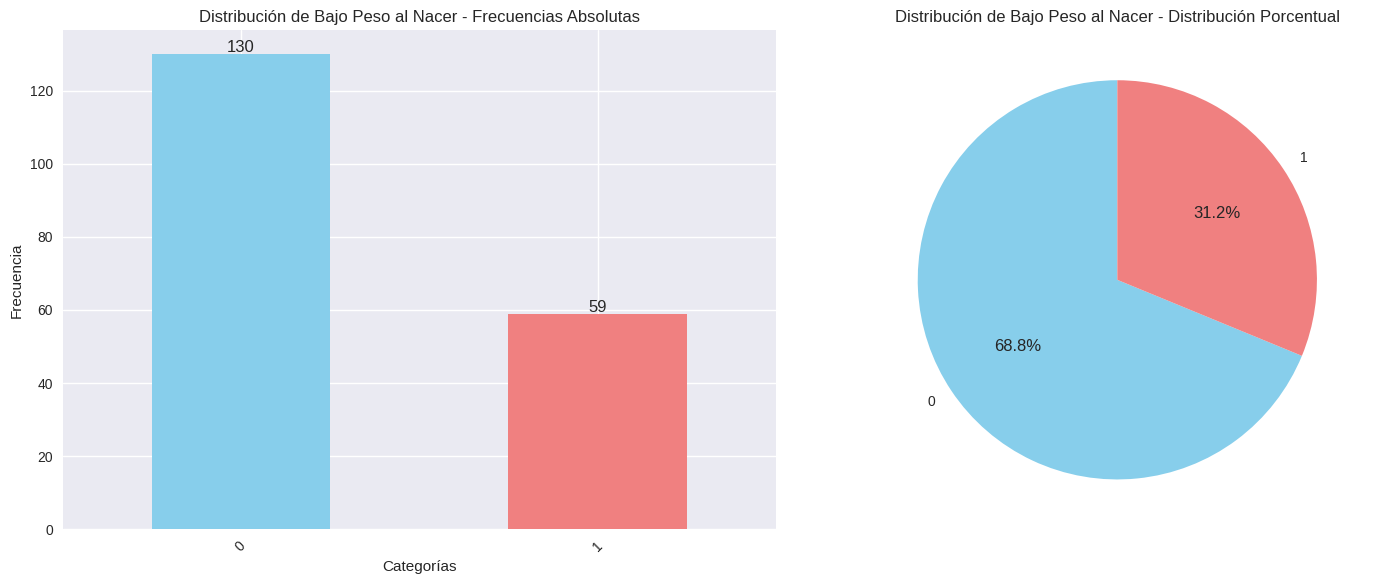

In [ ]:
# Crear gráficos para bajo peso
crear_graficos_frecuencia(df['Bajo_peso'], 'Distribución de Bajo Peso al Nacer')

In [ ]:
# Interpretación
casos_bajo_peso = df['Bajo_peso'].sum()
total_casos = len(df)
porcentaje_problema = (casos_bajo_peso / total_casos) * 100

In [ ]:
print(f"""
📊 INTERPRETACIÓN:
- Se registraron {casos_bajo_peso} casos de bajo peso al nacer de {total_casos} nacimientos
- Esto representa el {porcentaje_problema:.1f}% de los casos
- {'SÍ existe un problema significativo' if porcentaje_problema > 15 else 'El problema es moderado'}
  (OMS considera problemático >15% de bajo peso al nacer)
""")


📊 INTERPRETACIÓN:
- Se registraron 59 casos de bajo peso al nacer de 189 nacimientos
- Esto representa el 31.2% de los casos
- SÍ existe un problema significativo 
  (OMS considera problemático >15% de bajo peso al nacer)



En los datos, observamos que un 69% de los niños nacieron con peso normal, mientras que un 31% con bajo peso, lo que representa un valor alto en el contexto del problema

### 6. Construya la distribución de frecuencias de la raza de la madre con el bajo peso. ¿Existe alguna relación?

In [ ]:
print("\n" + "="*60)
print("6: BAJO PESO POR RAZA DE LA MADRE")
print("="*60)

tabla_raza_bajo_peso, pct_raza_bajo_peso = tabla_cruzada(
    df['Raza'], df['Bajo_peso'], 'Raza', 'Bajo Peso', normalize='index'
)


6: BAJO PESO POR RAZA DE LA MADRE

🔄 TABLA CRUZADA: RAZA vs BAJO PESO
FRECUENCIAS ABSOLUTAS:
Bajo_peso    0   1  TOTAL
Raza                     
black       15  11     26
other       42  25     67
white       73  23     96
TOTAL      130  59    189

PORCENTAJES (por fila):
Bajo_peso      0      1
Raza                   
black      57.69  42.31
other      62.69  37.31
white      76.04  23.96
TOTAL      68.78  31.22


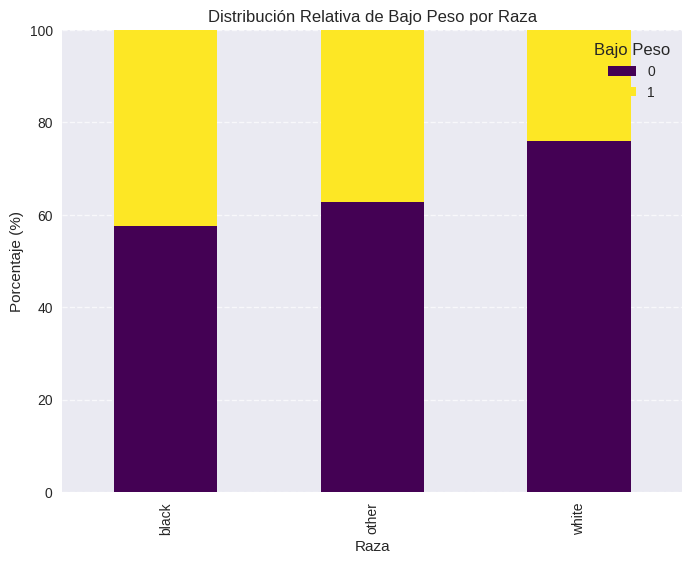

In [ ]:
# Tabla de frecuencia relativa por filas (normalizada)
frec_relativa_filas = pd.crosstab(df['Raza'], df['Bajo_peso'], normalize='index') * 100

# Gráfico de barras apiladas al 100%
frec_relativa_filas.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8,6))

plt.title("Distribución Relativa de Bajo Peso por Raza")
plt.xlabel("Raza")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Bajo Peso")
plt.ylim(0, 100)  # Asegura que el eje y vaya de 0 a 100%
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Interpretar .....

## 7. Calcular las estadísticas descriptivas del peso al nacer por cada raza de la madre. Compare los resultados.

In [ ]:
for raza in df['Raza'].unique():
    datos_raza = df[df['Raza'] == raza]['peso_nacer']
    estadisticas_descriptivas(datos_raza, f'Peso al nacer - Raza {raza}')


📈 ESTADÍSTICAS DESCRIPTIVAS: PESO AL NACER - RAZA WHITE
                 Estadística     Valor
     Número de observaciones     96.00
                       Media   3103.01
                     Mediana   3076.00
                        Moda   3651.00
         Desviación estándar    727.87
                    Varianza 529798.28
                      Mínimo   1021.00
                      Máximo   4990.00
           Q1 (Percentil 25)   2584.75
           Q3 (Percentil 75)   3651.00
       Rango intercuartílico   1066.25
Coeficiente de variación (%)     23.46

📈 ESTADÍSTICAS DESCRIPTIVAS: PESO AL NACER - RAZA BLACK
                 Estadística     Valor
     Número de observaciones     26.00
                       Media   2719.69
                     Mediana   2849.00
                        Moda   2920.00
         Desviación estándar    638.68
                    Varianza 407917.10
                      Mínimo   1135.00
                      Máximo   3860.00
           Q1 (Percentil 25)

Interpretar...

## 12. Construya un gráfico de caja y bigotes para el peso de la madre por cada bajo peso.

In [ ]:
def boxplot_comparativo(data, variable_numerica, variable_categorica, titulo):
    """
    Crea un boxplot comparativo entre grupos.

    Parameters:
        data (pd.DataFrame): Dataset
        variable_numerica (str): Variable numérica a comparar
        variable_categorica (str): Variable categórica para agrupar
        titulo (str): Título del gráfico
    """

    plt.figure(figsize=(10, 6))

    # Crear boxplot
    sns.boxplot(data=data, x=variable_categorica, y=variable_numerica,
                palette=['lightblue', 'lightcoral'])

    plt.title(titulo)
    plt.xlabel(variable_categorica.replace('_', ' ').title())
    plt.ylabel(variable_numerica.replace('_', ' ').title())

    # Agregar estadísticas en el gráfico
    for i, categoria in enumerate(data[variable_categorica].unique()):
        subset = data[data[variable_categorica] == categoria][variable_numerica]
        media = subset.mean()
        plt.text(i, media, f'Media: {media:.0f}',
                ha='center', va='bottom',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-948109130.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=variable_categorica, y=variable_numerica,


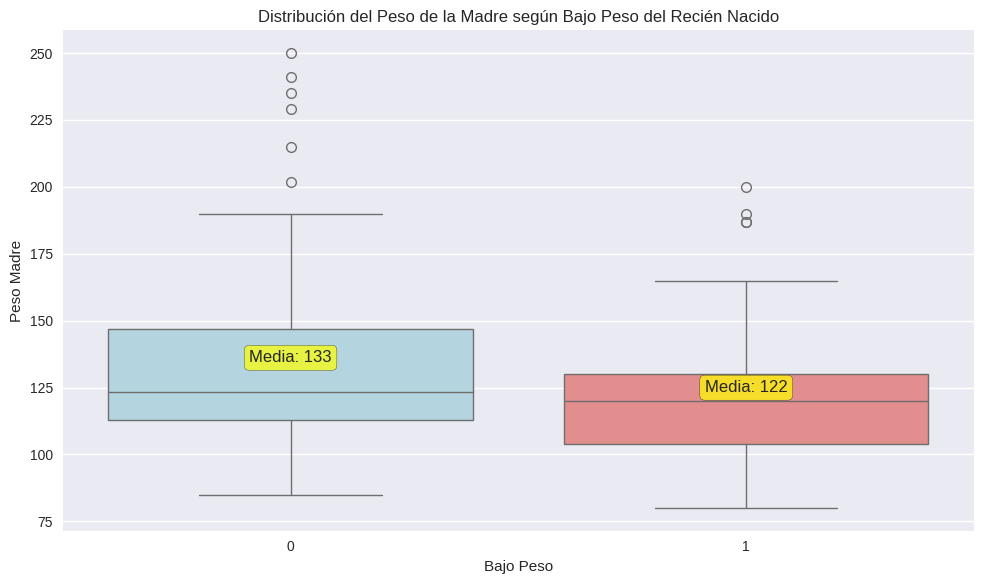

In [ ]:
boxplot_comparativo(df, 'Peso_madre', 'Bajo_peso',
                   'Distribución del Peso de la Madre según Bajo Peso del Recién Nacido')

## 🎯 SIGUIENTES ACTIVIDADES:

1. Completa el análisis de las preguntas 7-11 usando las funciones creadas
2. Interpreta los resultados estadísticos obtenidos
3. Crea visualizaciones adicionales para otras variables
4. Desarrolla la conclusión general del estudio (pregunta 14)

💡 CONSEJOS:
- Usa las funciones estadisticas_descriptivas() para variables numéricas
- Usa tabla_frecuencias() y tabla_cruzada() para variables categóricas
- Siempre interpreta los resultados en el contexto del problema
- Compara los grupos de interés (bajo peso vs peso normal)

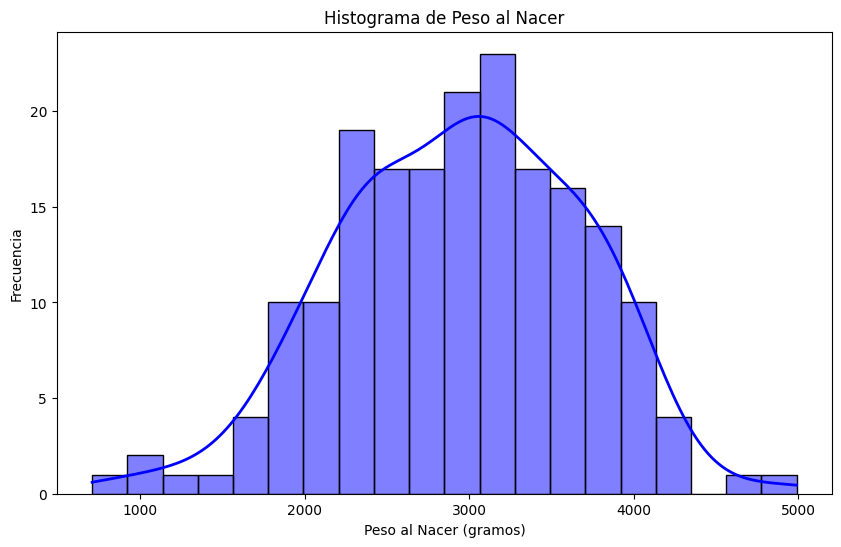

In [ ]:
#                        Otros gráficos                       #

# Histograma de 'peso_nacer'
plt.figure(figsize=(10, 6))

# Histograma con barras rojas y curva de densidad azul
sns.histplot(df['peso_nacer'], bins=20, kde=True, color='blue',
             line_kws={'color': 'red', 'linewidth': 2})  # Personalizar la curva KDE

# Títulos y etiquetas
plt.title("Histograma de Peso al Nacer")
plt.xlabel("Peso al Nacer (gramos)")
plt.ylabel("Frecuencia")

# Mostrar gráfico
plt.show()

